In [1]:
from sklearn.manifold import TSNE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
d=pd.read_csv('/home/anu/Downloads/mnist_train.csv')
d.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
l=d['label']
d=d.drop('label',axis=1)
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


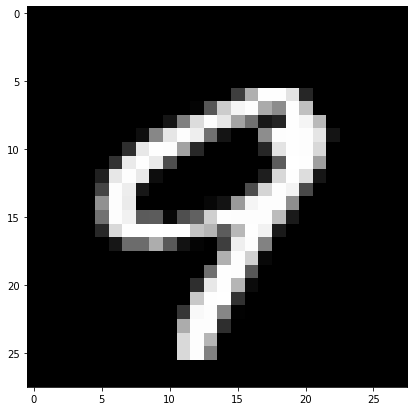

[100]


In [6]:
plt.figure(figsize=(7,7))
idx=100
grid_data=d.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data,interpolation="none",cmap="gray")
plt.show()
print([idx])

In [7]:
labels=l.head(15000)
data=d.head(15000)
print('shape of the sample data=',data.shape)

shape of the sample data= (15000, 784)


In [9]:
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


/home/anu/yes/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


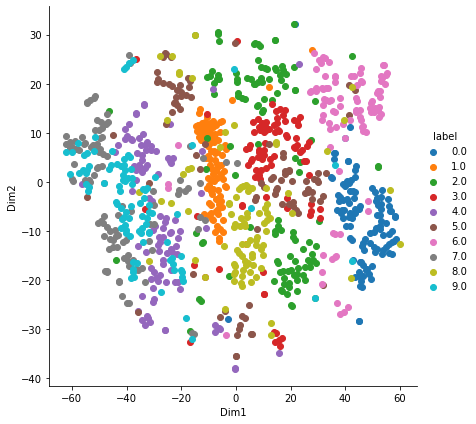

In [10]:
data_1000=standardized_data[0:1000,:]
labels_1000=labels[0:1000]
model=TSNE(n_components=2,random_state=0)

#default perplexity=30
#default learning rate=200
#default Maximum number of iterations of the optimization=1000

tsne_data=model.fit_transform(data_1000)

tsne_data=np.vstack((tsne_data.T,labels_1000)).T

tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim1","Dim2",'label'))

sns.FacetGrid(tsne_df,hue='label',size=6).map(plt.scatter,'Dim1','Dim2').add_legend()
plt.show()

/home/anu/yes/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


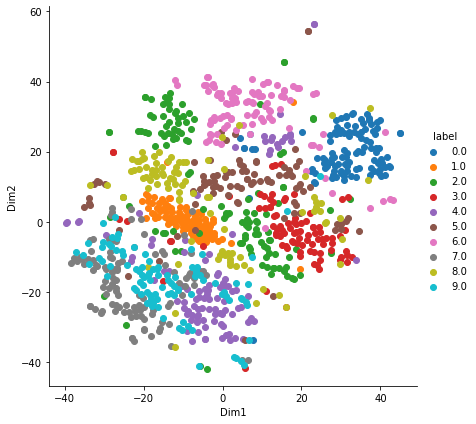

In [13]:

data_1000=standardized_data[0:1000,:]
labels_1000=labels[0:1000]
model=TSNE(n_components=2,random_state=0,perplexity=50,n_iter=10000)

#default perplexity=30
#default learning rate=200
#default Maximum number of iterations of the optimization=1000

tsne_data=model.fit_transform(data_1000)

tsne_data=np.vstack((tsne_data.T,labels_1000)).T

tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim1","Dim2",'label'))

sns.FacetGrid(tsne_df,hue='label',size=6).map(plt.scatter,'Dim1','Dim2').add_legend()
plt.show()